## 데이터 확인

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston() # 보스톤 주택가격 로드하기
boston_dt = boston.data # 독립변수(feature)만으로 된 numpy 형태
price = boston.target # 종속변수 값 numpy형태

df = pd.DataFrame(boston_dt, columns=boston.feature_names)
df['PRICE'] = price

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

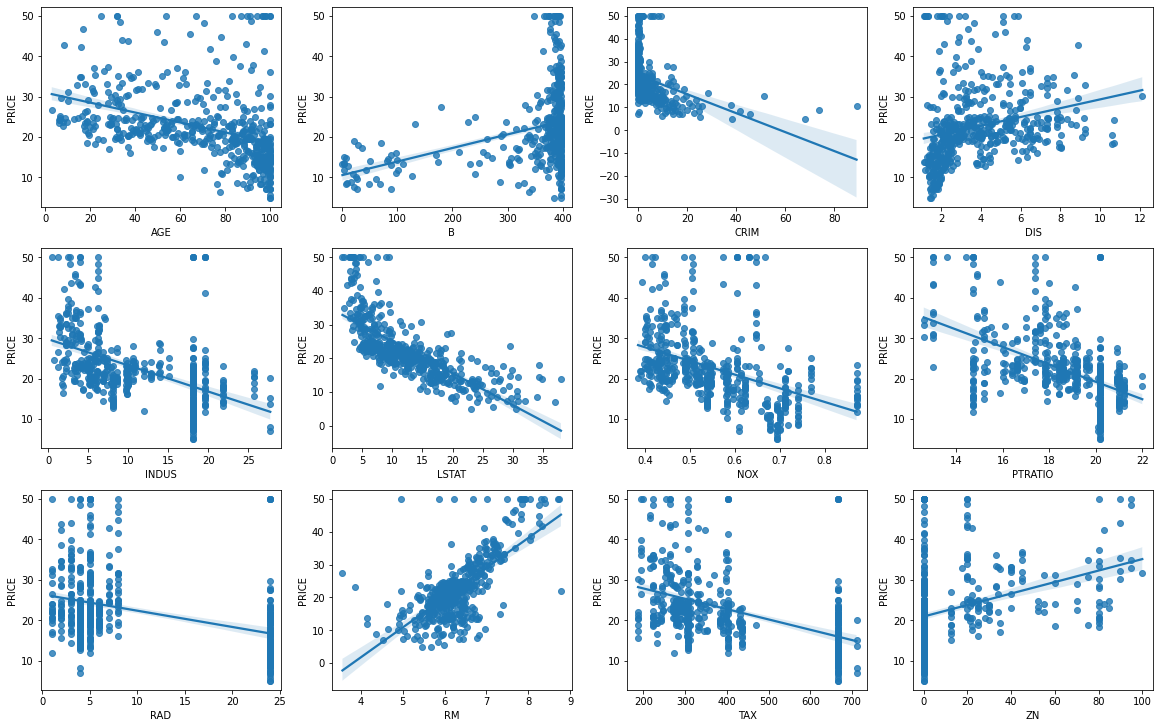

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fix, axes = plt.subplots(figsize=(16, 10), ncols=4, nrows=3, constrained_layout=True)
features = df.columns.difference(['PRICE', 'CHAS'])

for i, feature in zip(range(12), features):
  row = int(i/4)
  col = i%4
  sns.regplot(x=feature, y=df['PRICE'], data=df, ax=axes[row][col])

## 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split
x = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = df['PRICE'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
print(f'학습데이터세트 PRICE 평균: {y_train.mean()}')
print(f'평가데이터세트 PRICE 평균: {y_test.mean()}')

학습데이터세트 PRICE 평균: 22.796534653465343
평가데이터세트 PRICE 평균: 21.488235294117644


## 전처리

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

## 모델학습

In [10]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train = linear.predict(x_train_scaled)

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print(f'MAE: {mae:.5f}')
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R2: {r2:.5f}')

MAE: 3.32616
MSE: 22.11246
RMSE: 4.70239
R2: 0.74546


## 성능평가 및 예측값 저장

In [12]:
x_test_scaled = scaler.transform(x_test)
pred = linear.predict(x_test_scaled)

In [13]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f'MAE: {mae:.5f}')
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R2: {r2:.5f}')

MAE: 3.23724
MSE: 24.63539
RMSE: 4.96341
R2: 0.66406


In [14]:
pred_df = pd.DataFrame(pred, columns=['pred Price'])
pred_df.head()

,pred Price
0,29.218660
1,33.551467
2,14.810658
3,25.084725
4,19.173927


In [15]:
actual = pd.DataFrame(y_test, columns=['actual Price'])
actual.head()

,actual Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [16]:
reg_result = pd.concat([actual, pred_df], axis=1)
reg_result.to_csv('reg_result.csv', index=False, encoding='utf-8-sig')
reg_result.head()

,actual Price,pred Price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927
